In [2]:
%config IPCompleter.greedy=True
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder,LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

sns.set(style="darkgrid")

### Columns

country,
description,
designation,
points,
price,
province,
region_1,
region_2,
taster_name,
taster_twitter_handle,
title,
variety,
winery

#### Taken Features

country,
description,

price,
province,
region_1,
variety,
winery

#### Output

points

In [3]:
# Columns
# Features : country,designation,points,price,province,
# region_1,region_2,
# variety,winery
dataset = "winemag-data-130k-v2.csv"
df = pd.read_csv(dataset,delimiter=',',index_col=0)

df = df.drop(['region_2','description','taster_name', 'taster_twitter_handle','title'], axis=1)
df = df.drop_duplicates(subset='description', keep=False)
df = df.dropna()

Pinot Noir                   7516
Chardonnay                   5610
Red Blend                    5238
Cabernet Sauvignon           4239
Bordeaux-style Red Blend     2312
Syrah                        2237
Zinfandel                    1761
Riesling                     1642
Rosé                         1586
Nebbiolo                     1572
Malbec                       1525
Sparkling Blend              1487
Sauvignon Blanc              1471
White Blend                  1355
Tempranillo                  1199
Sangiovese                   1125
Merlot                       1107
Champagne Blend              1037
Rhône-style Red Blend         956
Cabernet Franc                617
Pinot Gris                    593
Gewürztraminer                517
Tempranillo Blend             493
Gamay                         476
Glera                         473
Shiraz                        425
Viognier                      421
Grenache                      405
Petite Sirah                  326
Pinot Grigio  

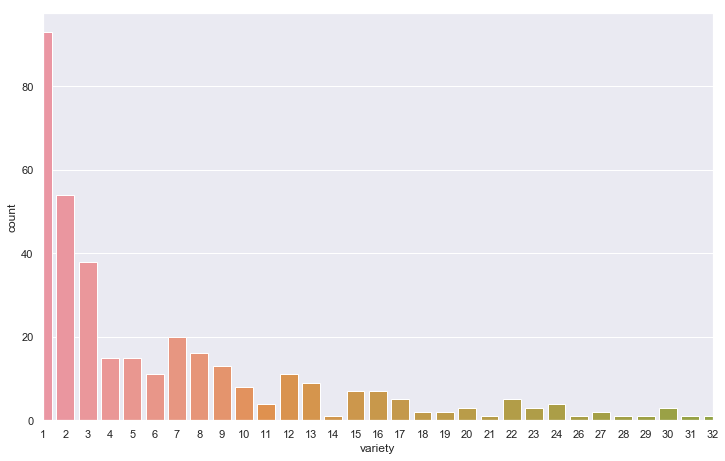

In [26]:
x = df['variety']
y = df['variety'].value_counts(sort=True)

print(y)
fig = plt.figure(figsize=(12,7.5))
ax = sns.countplot(y)
plt.xlim([0,30])
plt.show()

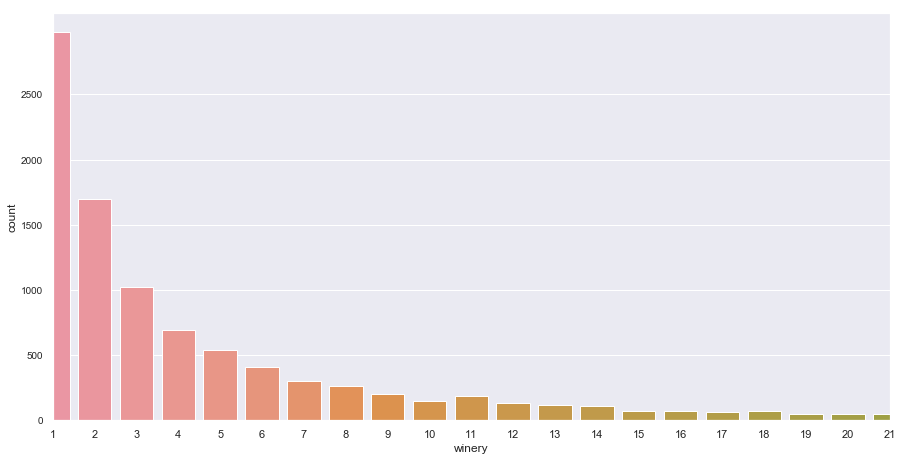

In [12]:
x = df['winery']
y = df['winery'].value_counts(sort=False)
fig = plt.figure(figsize=(15,7.5))
ax = sns.countplot(y)
plt.yticks(range(0, 3000, 500), fontsize=10)
plt.xlim([0,20])
plt.show()

# Take winery where 0 < y < 7

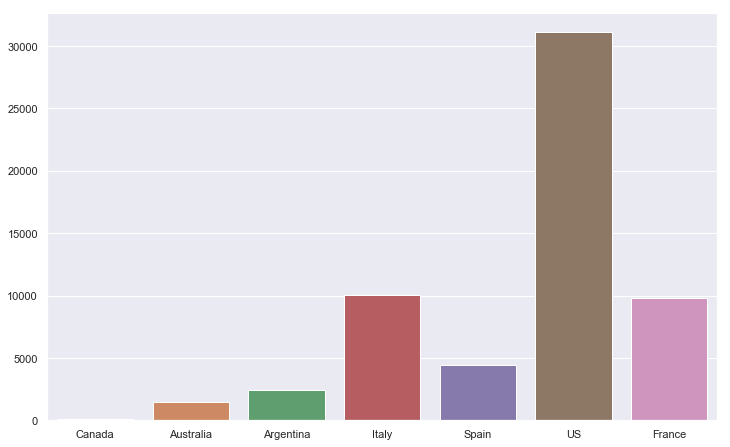

Canada         136
Australia     1427
Argentina     2410
Italy        10048
Spain         4401
US           31127
France        9782
Name: country, dtype: int64


In [14]:
x = df['country'].value_counts(sort=False)
countries = list(x.to_dict().keys())
freq = x.ravel()
fig = plt.figure(figsize=(12,7.5))
ax = sns.barplot(x=countries,y=freq)
plt.show()

print(x)
# Take country where y > 500

Text(0.5, 0, 'Price')

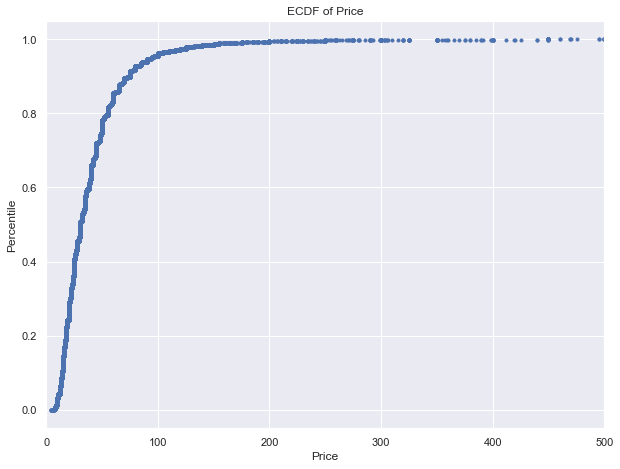

In [18]:
def ecdf(x):
    """Empirical cumulative distribution function of a variable"""
    # Sort in ascending order
    x = np.sort(x)
    n = len(x)
    
    # Go from 1/n to 1
    y = np.arange(1, n + 1, 1) / n
    
    return x, y

xs, ys = ecdf(df['price'])
plt.figure(figsize = (10, 7.5))
plt.plot(xs, ys, '.')
plt.xlim([0,500])
plt.ylabel('Percentile')
plt.title('ECDF of Price')
plt.xlabel('Price')

# Take price where y < 120

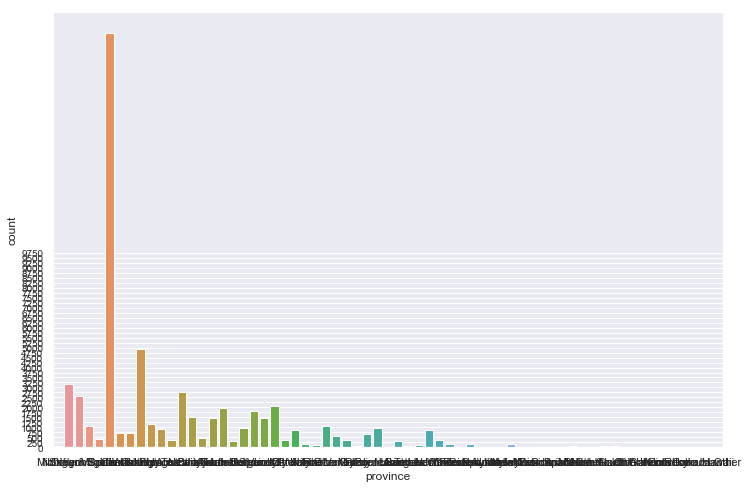

In [8]:
x = df['province']
y = df['province'].value_counts(sort=False)
fig = plt.figure(figsize=(12,8))
ax = sns.countplot(x)
plt.yticks(range(0, 10000, 250), fontsize=10)
plt.show()

# Take province where y > 300 

In [9]:
x = df['region_1'].value_counts()
print(x.mean())
print(x)

# Take region_1 where y > 200 

53.986351228389445
Napa Valley                                          2261
Columbia Valley (WA)                                 2074
Russian River Valley                                 2014
Mendoza                                              1416
Willamette Valley                                    1383
Paso Robles                                          1371
Alsace                                               1298
Champagne                                            1184
Rioja                                                1092
California                                           1081
Barolo                                                960
Finger Lakes                                          910
Sonoma Coast                                          896
Toscana                                               862
Sta. Rita Hills                                       693
Walla Walla Valley (WA)                               667
Yakima Valley                                        

In [10]:
x = df['description']
description_length = x.apply(len)

corr = np.corrcoef(description_length,df['points'])
print("Review Length and Point correlation: \n",corr)
print()
vectorizer = TfidfVectorizer(norm=None, analyzer='word',stop_words='english')
tfidf = vectorizer.fit_transform(df['description'])
scores = zip(vectorizer.get_feature_names(),np.asarray(tfidf.sum(axis=0)).ravel())
sorted_scores = np.array(sorted(scores, key=lambda x: x[1], reverse=True))

best_scores = sorted_scores[:,1].astype(float) > 300
best_keywords = sorted_scores[best_scores,0]

print(best_keywords)

Review Length and Point correlation: 
 [[1.         0.58908577]
 [0.58908577 1.        ]]

['wine' 'flavors' 'fruit' ... 'steep' 'stews' 'wintergreen']
